#Macd

Sua função principal é monitorar tendências e indicar possíveis sinais de mudança, confirmação ou reversão.

Traders can use the MACD indicator to identify potential entry and exit points.

 é calculada por meio da diferença entre a média móvel curta e a média móvel longa.

[*********************100%%**********************]  1 of 1 completed


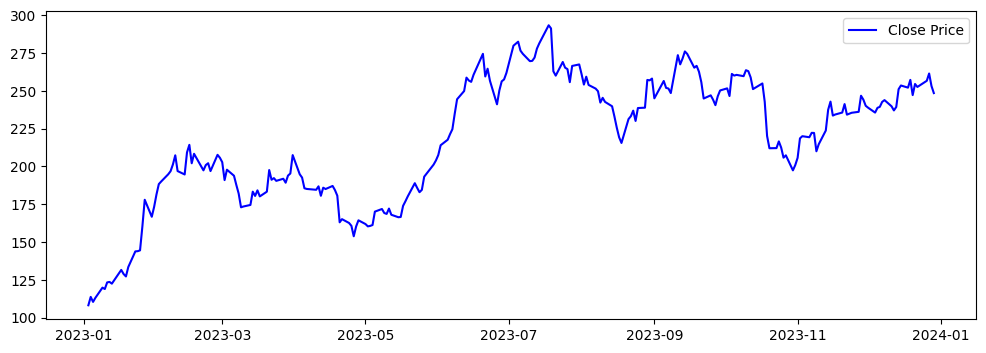

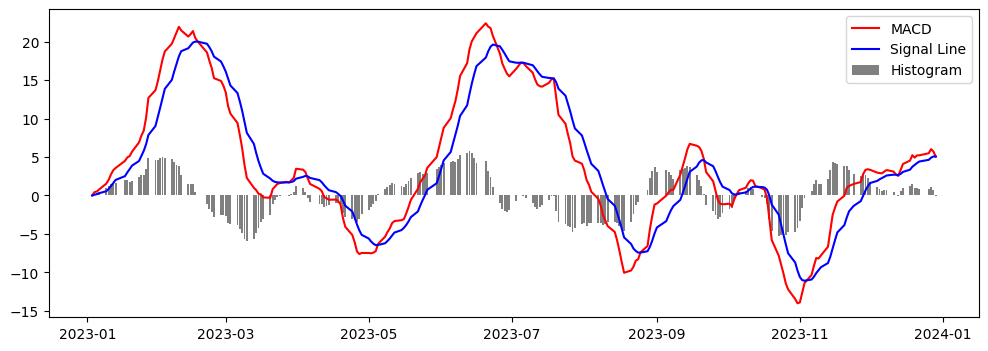

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


data = yf.download('TSLA', start='2023-01-01', end='2023-12-31')


short_ema = data['Close'].ewm(span=12, adjust=False).mean()
long_ema = data['Close'].ewm(span=26, adjust=False).mean()
macd = short_ema - long_ema
signal = macd.ewm(span=9, adjust=False).mean()
histogram = macd - signal


plt.figure(figsize=(12, 4))
plt.plot(data.index, data['Close'], label='Close', color='blue')
plt.legend()

plt.figure(figsize=(12, 4))
plt.plot(macd, label='MACD', color='red')
plt.plot(signal, label='Signal Line', color='blue')
plt.bar(histogram.index, histogram, label='Histogram', color='gray')
plt.legend()

plt.show()


In [4]:
pip install -U git+https://github.com/iqoptionapi/iqoptionapi.git

  Cloning https://github.com/iqoptionapi/iqoptionapi.git to /tmp/pip-req-build-krp21vqq
  Running command git clone --filter=blob:none --quiet https://github.com/iqoptionapi/iqoptionapi.git /tmp/pip-req-build-krp21vqq
  Resolved https://github.com/iqoptionapi/iqoptionapi.git to commit 8a903cc094a74af1ed935a56a2d6b5a9ed3319d7
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.6/515.6 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.6/200.6 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.6/275.6 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.3/92.3 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.8 MB/s eta 0:00:00
  Created wheel for iqoptionapi: filename=iqoptionapi-7.1.1-py3-none-any.whl size=82017 sha256=591e9fab4213320ac77ee6510ebf321fad6cd7bc19fb8ca48326eb698d0bbe9b
  Stored in directory: /tmp/pip-ephem-wheel-cache-k_wh79a9/wh

In [6]:
pip install python-dotenv

In [8]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
from iqoptionapi.stable_api import IQ_Option
import time
import logging
import os
from dotenv import load_dotenv

conta iqoption e pegando dados

In [9]:
load_dotenv()

False

In [10]:
iqoption_email = os.getenv("my_email")

In [11]:
iqoption_email

In [12]:
iqoption_password = os.getenv("my_password")

In [13]:
iqoption_password

In [14]:
logging.basicConfig(level=logging.DEBUG,format='%(asctime)s %(message)s')
Iq=IQ_Option('', '')

In [15]:
check, reason=Iq.connect()
print(check, reason)

True None


In [16]:
goal="EURUSD"

In [17]:
velas = Iq.get_candles(goal,60,111,time.time())

In [23]:
df = pd.DataFrame(velas)

In [24]:
df.head()

,id,from,at,to,open,close,min,max,volume
0,2380483,1710363720,1710363780000000000,1710363780,1.094780,1.095315,1.094770,1.095345,121
1,2380484,1710363780,1710363840000000000,1710363840,1.095320,1.095290,1.095225,1.095325,145
2,2380485,1710363840,1710363900000000000,1710363900,1.095300,1.095325,1.095180,1.095360,111
3,2380486,1710363900,1710363960000000000,1710363960,1.095330,1.095115,1.095060,1.095335,155
4,2380487,1710363960,1710364020000000000,1710364020,1.095125,1.095105,1.095075,1.095180,196


definindos ema 12 e 26

In [27]:
df['ema12']= df['close'].ewm(span=12).mean()
df.ema12

0      1.095315
1      1.095301
2      1.095311
3      1.095249
4      1.095210
         ...   
106    1.095060
107    1.095057
108    1.095047
109    1.095037
110    1.095025
Name: ema12, Length: 111, dtype: float64

In [29]:
df['ema26']=df['close'].ewm(span=26).mean()
df.ema26

0      1.095315
1      1.095302
2      1.095310
3      1.095256
4      1.095221
         ...   
106    1.095057
107    1.095056
108    1.095051
109    1.095046
110    1.095040
Name: ema26, Length: 111, dtype: float64

In [68]:
#MACD = 12-period closing price EMA – 26-period closing price EMA
df['macd']=df['ema26']-df['ema12']
df.macd

0      0.000000e+00
1      5.608974e-07
2     -3.706532e-07
3      6.796713e-06
4      1.094619e-05
           ...     
106   -3.215571e-06
107   -1.347701e-06
108    4.118846e-06
109    8.753585e-06
110    1.427896e-05
Name: macd, Length: 111, dtype: float64

In [69]:
#The signal line is the 9-period EMA of the MACD.
df['macd_signal']=df.macd.ewm(span=9).mean()
df.macd_signal

0      0.000000e+00
1     -3.116097e-07
2     -3.199373e-08
3     -2.323565e-06
4     -4.888601e-06
           ...     
106    8.289809e-06
107    6.901388e-06
108    4.697341e-06
109    2.007156e-06
110   -1.250068e-06
Name: macd, Length: 111, dtype: float64

In [46]:
df['histogram']=df.macd-df.macd_signal
df.histogram

0      0.000000e+00
1     -2.492877e-07
2      4.026470e-07
3     -4.473148e-06
4     -6.057587e-06
           ...     
106   -5.074238e-06
107   -5.553687e-06
108   -8.816187e-06
109   -1.076074e-05
110   -1.302890e-05
Name: macd, Length: 111, dtype: float64

In [70]:
df.head()

,id,from,at,to,open,close,min,max,volume,ema12,ema26,macd,macd_signal,histogram,previousClose,color,fill
0,2380483,1710363720,1710363780000000000,1710363780,1.094780,1.095315,1.094770,1.095345,121,1.095315,1.095315,0.000000e+00,0.000000e+00,0.000000e+00,NaN,red,"rgba(255, 0, 0, 0)"
1,2380484,1710363780,1710363840000000000,1710363840,1.095320,1.095290,1.095225,1.095325,145,1.095301,1.095302,5.608974e-07,3.116097e-07,-2.492877e-07,1.095315,red,red
2,2380485,1710363840,1710363900000000000,1710363900,1.095300,1.095325,1.095180,1.095360,111,1.095311,1.095310,-3.706532e-07,3.199373e-08,4.026470e-07,1.095290,green,"rgba(255, 0, 0, 0)"
3,2380486,1710363900,1710363960000000000,1710363960,1.095330,1.095115,1.095060,1.095335,155,1.095249,1.095256,6.796713e-06,2.323565e-06,-4.473148e-06,1.095325,red,red
4,2380487,1710363960,1710364020000000000,1710364020,1.095125,1.095105,1.095075,1.095180,196,1.095210,1.095221,1.094619e-05,4.888601e-06,-6.057587e-06,1.095115,red,red


In [ ]:
#We buy when the MACD is higher than the Signal line (histogram is positive)
#We sell when the MACD crosses below the Signal line (histogram is negative)

In [90]:
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.05, subplot_titles=("Close Price", "MACD"))


for index, row in df.iterrows():
    fig.add_trace(
        go.Scatter(
            x=df.index,
            y=df["close"],
            mode='lines',
            marker=dict(color='red'),

            showlegend=False),
        row=1, col=1
    )


fig.add_trace(
    go.Scatter(x=df.index, y=df['macd'], mode='lines', name='MACD', marker=dict(color='orange')),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=df.index, y=df['macd_signal'], mode='lines', name='Signal Line', marker=dict(color='blue')),
    row=2, col=1
)
fig.add_trace(
     go.Bar(x=df.index, y=df['histogram'], name='histogram', marker=dict(color='gray')),
    row=2, col=1

)

fig.show()